<a href="https://colab.research.google.com/github/prabhjot1309/Crime_Rate_Prediction_And_Analysis-/blob/main/Crime_Rate_Prediction_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA ANALYSIS**

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [ ]:
crime = pd.read_csv("crime.csv")
crime.head(5)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,Andhra Pradesh,ADILABAD,2013,96,72,13,61,0,61,65,...,30,2394,12,197,138,464,0,376,1390,6381
1,Andhra Pradesh,ANANTAPUR,2013,156,149,3,28,0,28,110,...,29,2537,23,337,43,161,0,573,1634,6913
2,Andhra Pradesh,CHITTOOR,2013,72,61,2,31,0,31,52,...,18,937,13,119,84,435,0,546,2239,5610
3,Andhra Pradesh,CUDDAPAH,2013,93,107,7,19,0,19,84,...,34,2310,9,318,163,207,0,464,1741,7048
4,Andhra Pradesh,CYBERABAD,2013,162,123,16,138,0,138,192,...,40,4284,43,350,338,1526,0,1104,3139,19992


In [ ]:
crime.dtypes

,0
STATE/UT,object
DISTRICT,object
YEAR,int64
MURDER,int64
ATTEMPT TO MURDER,int64
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,int64
RAPE,int64
CUSTODIAL RAPE,int64
OTHER RAPE,int64
KIDNAPPING & ABDUCTION,int64


In [ ]:
crime.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,...,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000
mean,2007.161890,88.565854,78.738618,9.754878,55.456098,0.005488,55.450610,85.836992,64.184553,21.652439,...,25.012398,753.362805,20.179878,106.482520,27.772967,202.046138,0.187602,226.296951,2214.523171,5404.141463
std,3.755581,325.417692,306.650391,58.733349,201.690457,0.111218,201.676202,354.035359,278.536450,93.769371,...,97.601717,3059.322654,97.446611,423.729483,170.367098,869.325453,2.319261,952.900601,8199.391921,18941.271529
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.000000,10.000000,0.000000,8.000000,0.000000,8.000000,10.000000,6.000000,2.000000,...,2.000000,43.750000,1.000000,10.000000,0.000000,11.000000,0.000000,5.000000,264.000000,857.750000
50%,2007.000000,37.000000,28.000000,2.000000,21.000000,0.000000,21.000000,26.000000,19.000000,5.000000,...,8.000000,199.000000,5.000000,33.000000,2.000000,49.000000,0.000000,70.000000,750.000000,2130.500000
75%,2010.000000,66.000000,57.000000,6.000000,43.000000,0.000000,43.000000,60.000000,46.000000,14.000000,...,19.000000,533.250000,16.000000,80.000000,13.000000,139.250000,0.000000,180.000000,1631.000000,4025.000000
max,2013.000000,7601.000000,7964.000000,1616.000000,4335.000000,5.000000,4335.000000,11183.000000,9737.000000,2685.000000,...,2830.000000,60488.000000,2335.000000,8252.000000,4970.000000,19865.000000,83.000000,16076.000000,127850.000000,234385.000000


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9840 non-null   object
 1   DISTRICT                                             9840 non-null   object
 2   YEAR                                                 9840 non-null   int64 
 3   MURDER                                               9840 non-null   int64 
 4   ATTEMPT TO MURDER                                    9840 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9840 non-null   int64 
 6   RAPE                                                 9840 non-null   int64 
 7   CUSTODIAL RAPE                                       9840 non-null   int64 
 8   OTHER RAPE                                           9840 non-null   int64 
 9

In [ ]:
crime.shape

(9840, 33)

In [ ]:
crime.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [ ]:
crime['YEAR'].unique()

array([2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003,
       2002, 2001])

In [ ]:
crime['STATE/UT'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       'Daman & Diu', 'Delhi UT', 'Lakshadweep', 'Puducherry',
       'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
     

In [ ]:
crime['DISTRICT'].unique()

array(['ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'CUDDAPAH', 'CYBERABAD',
       'EAST GODAVARI', 'GUNTAKAL RLY.', 'GUNTUR', 'GUNTUR URBAN',
       'HYDERABAD CITY', 'KARIMNAGAR', 'KHAMMAM', 'KRISHNA', 'KURNOOL',
       'MAHABOOBNAGAR', 'MEDAK', 'NALGONDA', 'NELLORE', 'NIZAMABAD',
       'PRAKASHAM', 'RAJAHMUNDRY', 'RANGA REDDY', 'SECUNDERABAD RLY.',
       'SRIKAKULAM', 'TIRUPATHI URBAN', 'VIJAYAWADA CITY',
       'VIJAYAWADA RLY.', 'VISAKHA RURAL', 'VISAKHAPATNAM',
       'VIZIANAGARAM', 'WARANGAL', 'WARANGAL URBAN', 'WEST GODAVARI',
       'ZZ TOTAL', 'ANJAW', 'CHANGLANG', 'DIBANG VALLEY', 'K/KUMEY',
       'KAMENG EAST', 'KAMENG WEST', 'LOHIT', 'LONGDING', 'PAPUM PARE',
       'RURAL', 'SIANG EAST', 'SIANG UPPER', 'SIANG WEST',
       'SUBANSIRI LOWER', 'SUBANSIRI UPPER', 'TAWANG', 'TIRAP',
       'UPPER DIBANG VALLEY', 'BAKSA', 'BARPETA', 'BIEO', 'BONGAIGAON',
       'C.I.D.', 'CACHAR', 'CHIRANG', 'DARRANG', 'DHEMAJI', 'DHUBRI',
       'DIBRUGARH', 'G.R.P.', 'GOALPARA', 'GOLAGHAT', 'GU

In [ ]:
# check null values
crime.isnull().sum()

,0
STATE/UT,0
DISTRICT,0
YEAR,0
MURDER,0
ATTEMPT TO MURDER,0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,0
RAPE,0
CUSTODIAL RAPE,0
OTHER RAPE,0
KIDNAPPING & ABDUCTION,0


In [ ]:
crime_cleaned = crime.dropna() #to remove rows with missing values
crime_cleaned = crime.dropna(subset=['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']) #Remove rows where specific column having NaN
crime_cleaned

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,Andhra Pradesh,ADILABAD,2013,96,72,13,61,0,61,65,...,30,2394,12,197,138,464,0,376,1390,6381
1,Andhra Pradesh,ANANTAPUR,2013,156,149,3,28,0,28,110,...,29,2537,23,337,43,161,0,573,1634,6913
2,Andhra Pradesh,CHITTOOR,2013,72,61,2,31,0,31,52,...,18,937,13,119,84,435,0,546,2239,5610
3,Andhra Pradesh,CUDDAPAH,2013,93,107,7,19,0,19,84,...,34,2310,9,318,163,207,0,464,1741,7048
4,Andhra Pradesh,CYBERABAD,2013,162,123,16,138,0,138,192,...,40,4284,43,350,338,1526,0,1104,3139,19992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,DELHI UT,WEST,2001,70,51,12,45,0,45,151,...,3,252,18,65,2,22,0,4,4151,7690
9836,LAKSHADWEEP,LAKSHADWEEP,2001,1,0,0,0,0,0,0,...,2,3,0,0,0,0,0,0,17,36
9837,LAKSHADWEEP,TOTAL,2001,1,0,0,0,0,0,0,...,2,3,0,0,0,0,0,0,17,36
9838,PUDUCHERRY,PONDICHERRY,2001,25,32,1,9,0,9,4,...,31,635,1,35,27,3,0,166,2324,4068


In [ ]:
# convert the STATE/UT and DISTRICT columns to uppercase
crime['STATE/UT'] = crime['STATE/UT'].str.upper()
crime['DISTRICT'] = crime['DISTRICT'].str.upper()

In [ ]:
def state(name):
    state = crime.groupby(['STATE/UT','DISTRICT','YEAR']).sum()['TOTAL IPC CRIMES']
    return state[name]

In [ ]:
state('MAHARASHTRA')

DISTRICT    YEAR
AHMEDNAGAR  2001      4391
            2002      4506
            2003      4251
            2004      4738
            2005      5241
                     ...  
YAVATMAL    2010      4777
            2011      5008
            2012      6365
            2013     12567
ZZ TOTAL    2013    234385
Name: TOTAL IPC CRIMES, Length: 598, dtype: int64

In [ ]:
# Clean column names by stripping whitespace
crime.columns = crime.columns.str.strip()

In [ ]:
# Convert 'YEAR' to integer if it's not already
crime['YEAR'] = crime['YEAR'].astype(int)
print(crime['YEAR'])

0       2013
1       2013
2       2013
3       2013
4       2013
        ... 
9835    2001
9836    2001
9837    2001
9838    2001
9839    2001
Name: YEAR, Length: 9840, dtype: int64


In [ ]:
# Aggregate(Combining Multiple rows of data into single row) total crimes by state and year for analysis

crime_filtered = crime[crime['DISTRICT'] != ' TOTAL'] # Remove aggregated rows
crime_state_year_crimes = crime_filtered.groupby(['STATE/UT', 'YEAR'])['TOTAL IPC CRIMES'].sum().reset_index()#Group data by State/UT and Year and sum IPC crimes
print("8 Total IPC Crimes by State/UT and Year (Aggregated) ")
print(crime_state_year_crimes.head(10))

8 Total IPC Crimes by State/UT and Year (Aggregated) 
        STATE/UT  YEAR  TOTAL IPC CRIMES
0  A & N ISLANDS  2001              1316
1  A & N ISLANDS  2002              1216
2  A & N ISLANDS  2003              1288
3  A & N ISLANDS  2004              1496
4  A & N ISLANDS  2005              1364
5  A & N ISLANDS  2006              1352
6  A & N ISLANDS  2007              1614
7  A & N ISLANDS  2008              1764
8  A & N ISLANDS  2009              1882
9  A & N ISLANDS  2010              1960


In [ ]:
#  Distribution of Specific Crime Types (e.g., MURDER, RAPE, THEFT)
# Select relevant crime columns for distribution analysis
crime_types = ['MURDER', 'RAPE', 'THEFT', 'ROBBERY', 'BURGLARY']
crime_crimes_sum = crime_filtered[crime_types].sum().sort_values(ascending=False).reset_index()
crime_crimes_sum.columns = ['Crime Type', 'Total Count']
print(crime_crimes_sum)
print(crime_crimes_sum.columns)


  Crime Type  Total Count
0      THEFT      7746304
1   BURGLARY      2443480
2     MURDER       871488
3    ROBBERY       560388
4       RAPE       545688
Index(['Crime Type', 'Total Count'], dtype='object')


# DATA VISUALIZATION

1. *Bar Graph to show Top 10 States/UTs by Total IPC Crimes in 2013*

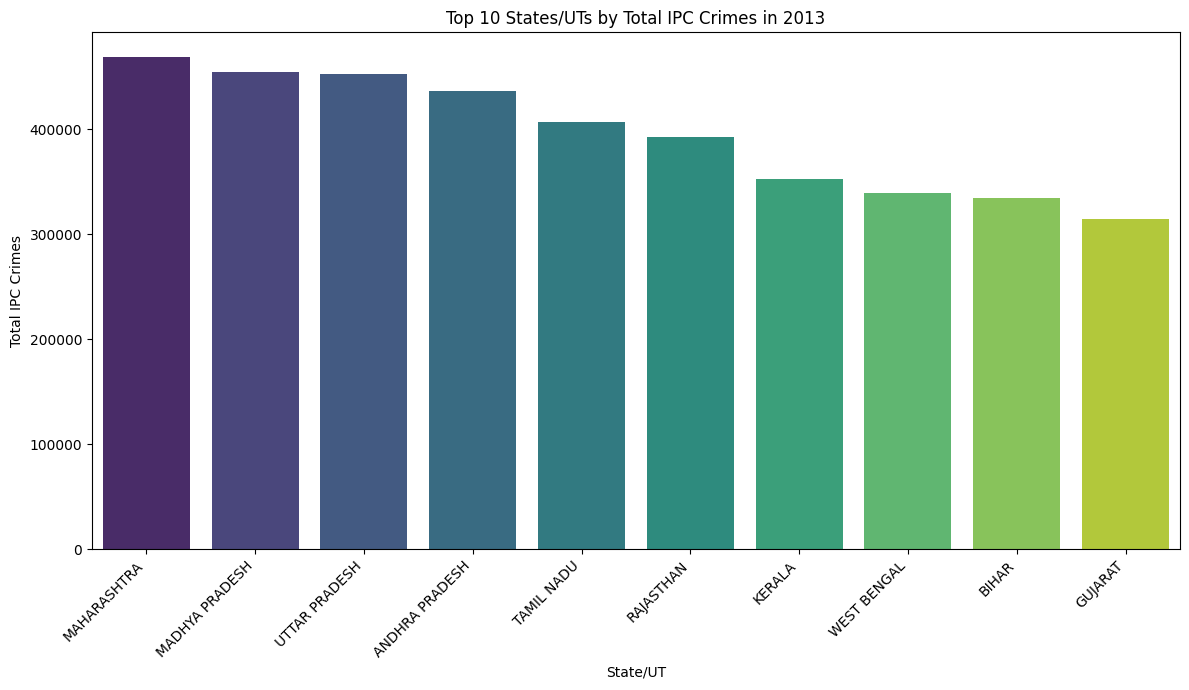

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define latest year from the dataset
latest_year = crime_state_year_crimes['YEAR'].max()

# Filter and sort data
latest_year_crimes = crime_state_year_crimes[crime_state_year_crimes['YEAR'] == latest_year].sort_values(by='TOTAL IPC CRIMES', ascending=False)
top_10_states_latest = latest_year_crimes.head(10)

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(
    x='STATE/UT',
    y='TOTAL IPC CRIMES',
    hue='STATE/UT',            # Fix FutureWarning
    data=top_10_states_latest,
    palette='viridis',
    dodge=False,
    legend=False
)

plt.title(f'Top 10 States/UTs by Total IPC Crimes in {latest_year}')
plt.xlabel('State/UT')
plt.ylabel('Total IPC Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


2. Bar graph 📊 for Total Count of Major IPC Crime Types (2001-2013)*

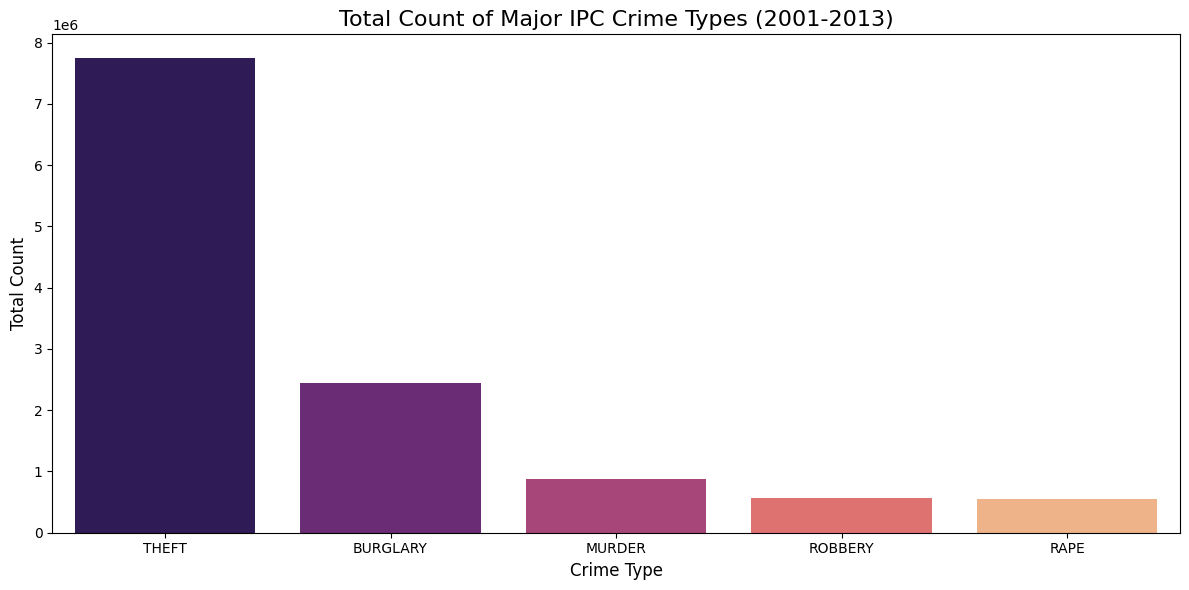

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=crime_crimes_sum, x='Crime Type', y='Total Count', hue='Crime Type', palette='magma')
plt.title('Total Count of Major IPC Crime Types (2001-2013)', fontsize=16)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.tight_layout()
plt.show()


3. *Displot for TOTAL IPC CRIMES*

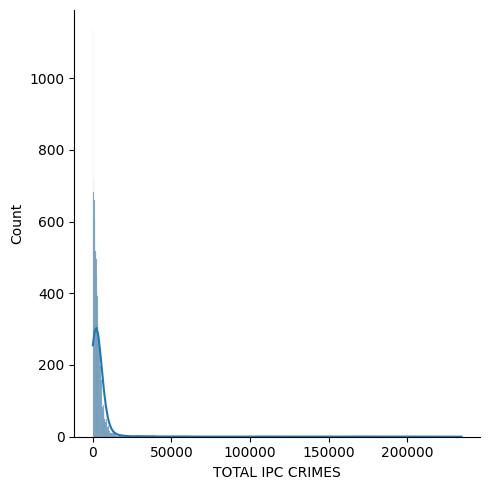

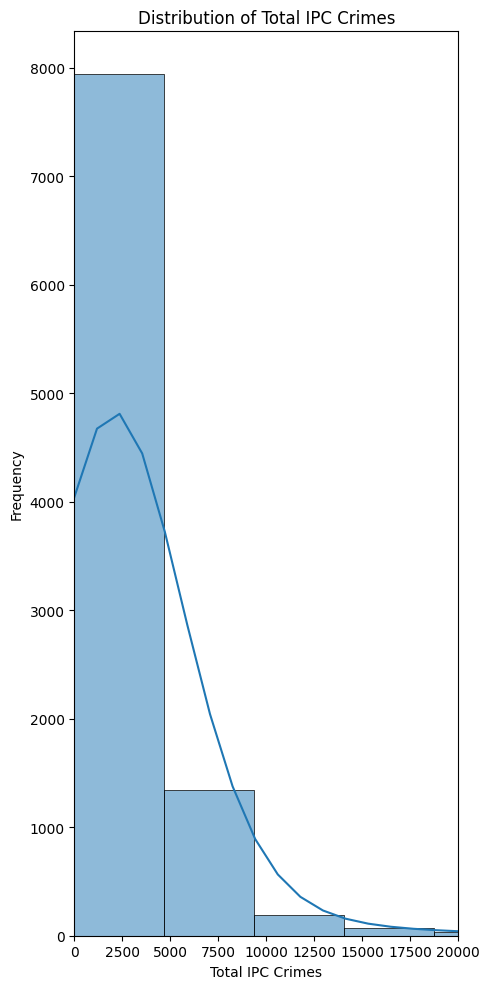

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# First plot: distribution of total crimes
sns.displot(crime['TOTAL IPC CRIMES'], kde=True)
plt.tight_layout()

# Second plot: same data but using histplot (replacing deprecated distplot)
plt.figure(figsize=(5, 10))
sns.histplot(crime['TOTAL IPC CRIMES'], bins=50, kde=True)
plt.title('Distribution of Total IPC Crimes')
plt.xlabel('Total IPC Crimes')
plt.ylabel('Frequency')
plt.xlim(0, 20000)

plt.tight_layout()
plt.show()


4. *Histplot for Distribution of Total IPC Crimes*

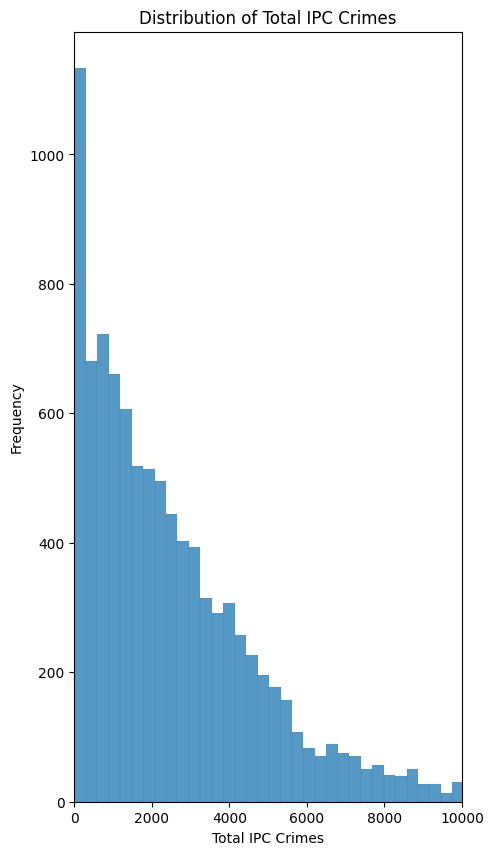

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,10))
sns.histplot(crime['TOTAL IPC CRIMES'])
plt.title('Distribution of Total IPC Crimes')
plt.xlabel('Total IPC Crimes')
plt.ylabel('Frequency')
plt.xlim(0,10000)
plt.show()

5. *multi-line time series plot for Total IPC Crimes Over Years for Top 5 States/UTs*

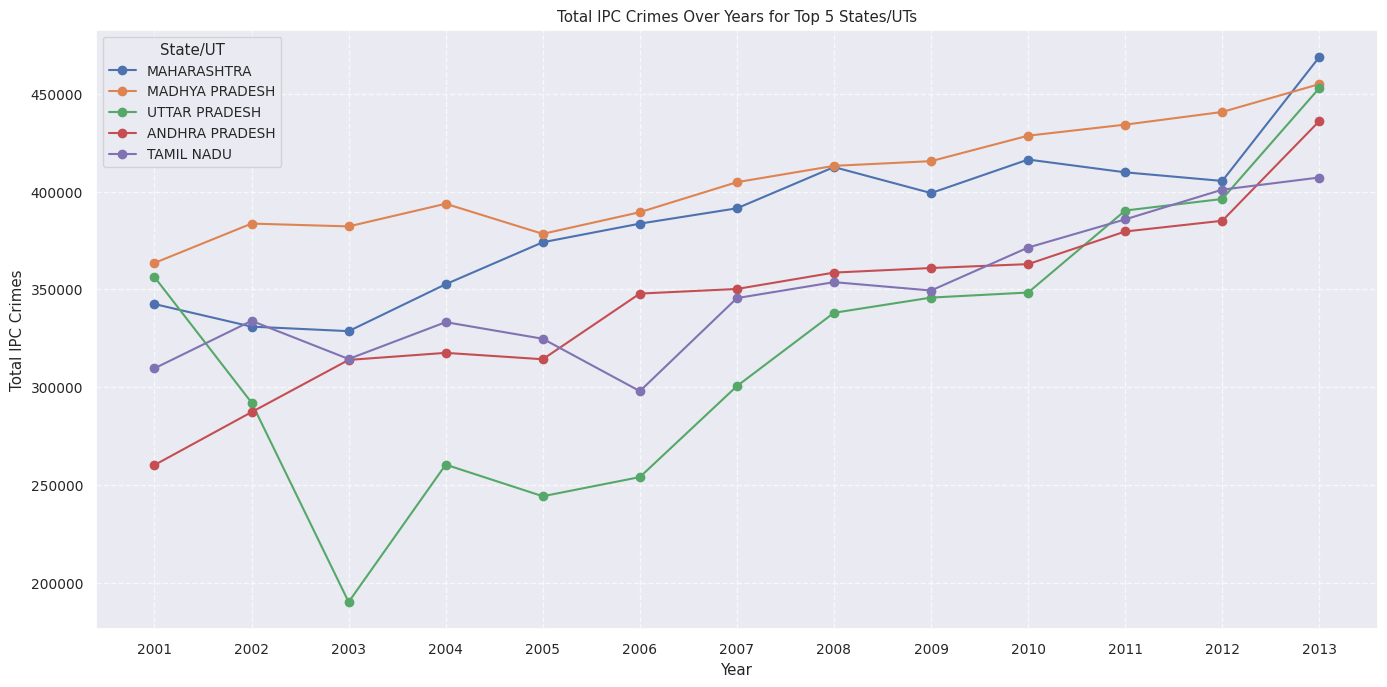

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Latest year
latest_year = crime_state_year_crimes['YEAR'].max()

# Top 5 states by total IPC crimes in latest year
top_states = (
    crime_state_year_crimes[crime_state_year_crimes['YEAR'] == latest_year]
    .nlargest(5, 'TOTAL IPC CRIMES')['STATE/UT']
)

# Plotting
for state in top_states:
    state_data = crime_state_year_crimes[crime_state_year_crimes['STATE/UT'] == state]
    plt.plot(state_data['YEAR'], state_data['TOTAL IPC CRIMES'], marker='o', label=state)

plt.title('Total IPC Crimes Over Years for Top 5 States/UTs')
plt.xlabel('Year')
plt.ylabel('Total IPC Crimes')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='State/UT', loc='upper left')
plt.xticks(sorted(crime_state_year_crimes['YEAR'].unique()))  # Ensure proper order
plt.tight_layout()
plt.show()


6. *Histplot for Distribution of **Murder Cases** Across Districts in 2013*

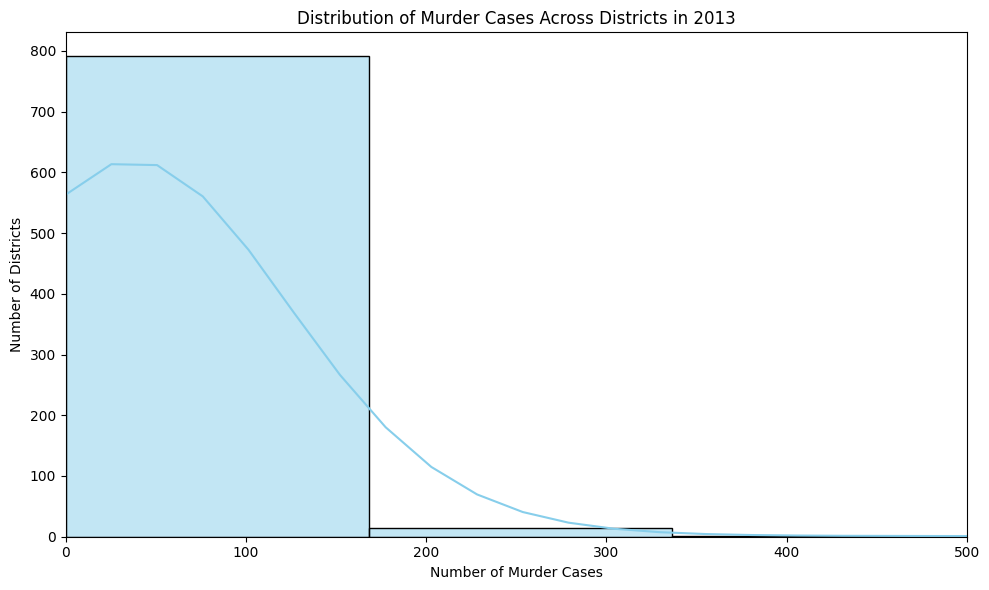

In [ ]:
# Step 1: Calculate the latest year
latest_year = crime['YEAR'].max()  # make sure 'crime_data' exists

# Step 2: Filter the dataframe for that year
crime_latest_year = crime[crime['YEAR'] == latest_year]

# Step 3: Plot the histogram using the filtered dataframe
plt.figure(figsize=(10, 6))
sns.histplot(crime_latest_year['MURDER'], bins=30, kde=True, color='skyblue')
plt.title(f'Distribution of Murder Cases Across Districts in {latest_year}')
plt.xlabel('Number of Murder Cases')
plt.ylabel('Number of Districts')
plt.xlim(0, 500)
plt.tight_layout()
plt.show()


7. *Histplot for Distribution of **Rape Cases** Across Districts in 2013*

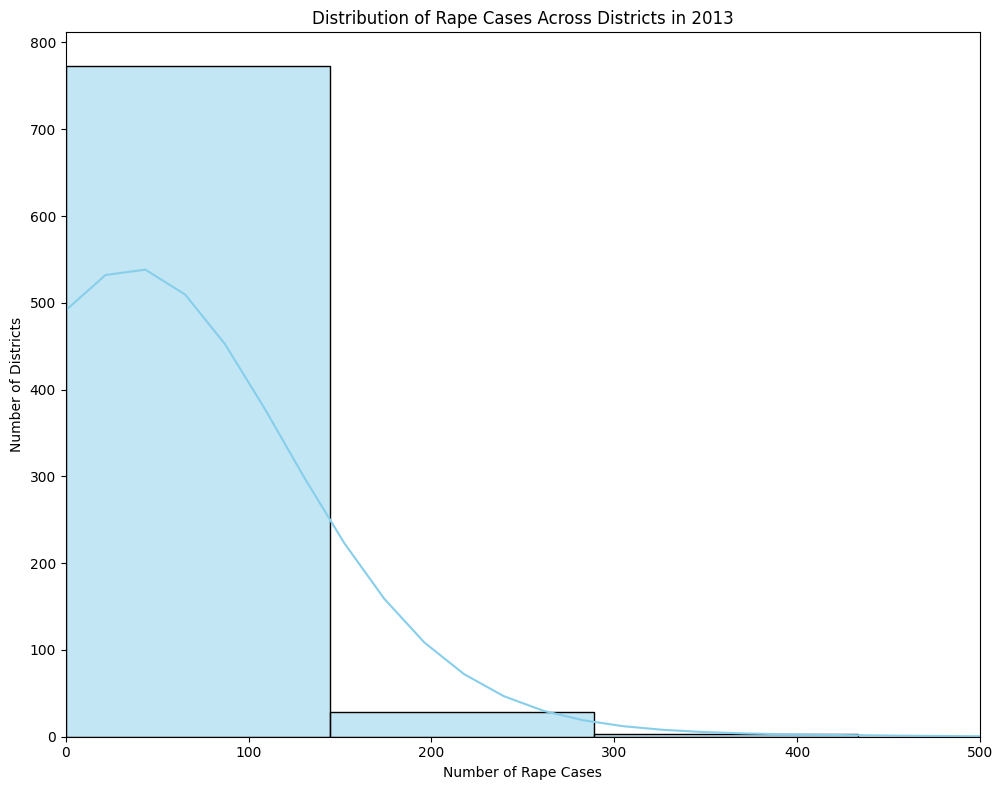

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(crime_latest_year['RAPE'], bins=30, kde=True, color='skyblue')
plt.title(f'Distribution of Rape Cases Across Districts in {latest_year}')
plt.xlabel('Number of Rape Cases')
plt.ylabel('Number of Districts')
plt.tight_layout()
plt.xlim(0,500)
plt.show()

8.*Pie Chart Proportion of Top Crime Types in 2013*

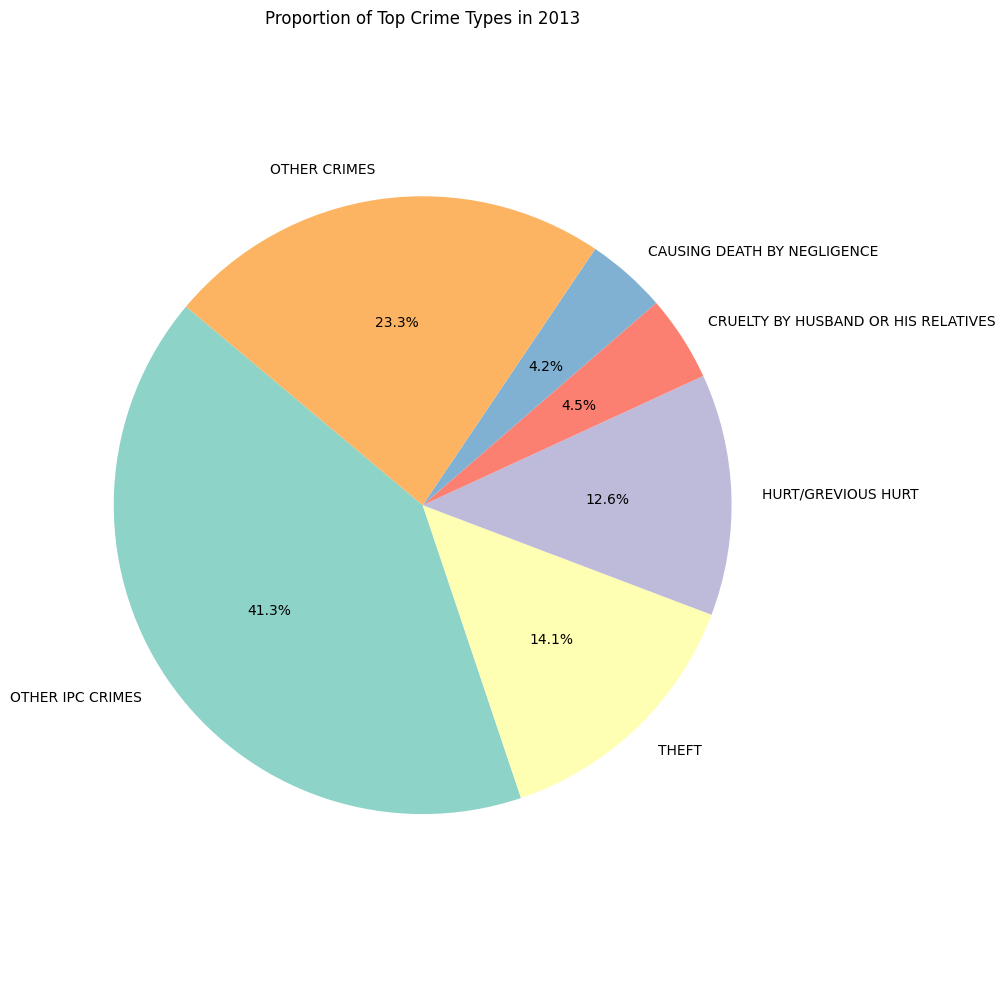

In [ ]:
plt.figure(figsize=(10, 10))
# Sum all crime types for the latest year (excluding total columns)
crime_types = crime_latest_year.drop(columns=['STATE/UT', 'DISTRICT', 'YEAR', 'TOTAL IPC CRIMES', 'KIDNAPPING & ABDUCTION', 'OTHER RAPE', 'AUTO THEFT', 'OTHER THEFT']).sum()
# Get top 5 crime types
top_5_crimes = crime_types.nlargest(5)
# Sum of other crimes
other_crimes_sum = crime_types.drop(top_5_crimes.index).sum()
# Combine top 5 with 'Other'
pie_data = pd.concat([top_5_crimes, pd.Series({'OTHER CRIMES': other_crimes_sum})])
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140,colors=sns.color_palette('Set3'))
plt.title(f'Proportion of Top Crime Types in {latest_year}')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

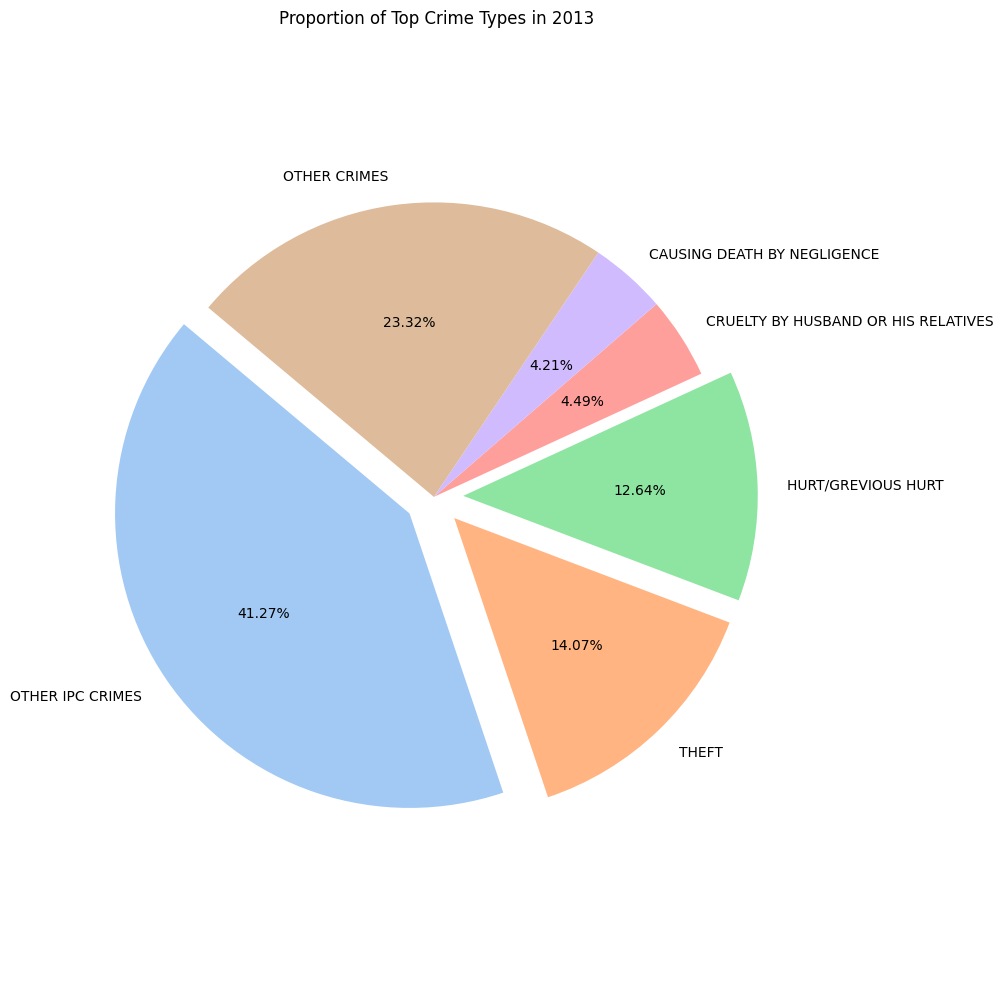

In [ ]:
plt.figure(figsize=(10, 10))
# Sum all crime types for the latest year (excluding total columns)
crime_types = crime_latest_year.drop(columns=['STATE/UT', 'DISTRICT', 'YEAR', 'TOTAL IPC CRIMES', 'KIDNAPPING & ABDUCTION', 'OTHER RAPE', 'AUTO THEFT', 'OTHER THEFT']).sum()
# Get top 5 crime types
top_5_crimes = crime_types.nlargest(5)
# Sum of other crimes
other_crimes_sum = crime_types.drop(top_5_crimes.index).sum()
# Combine top 5 with 'Other'
pie_data = pd.concat([top_5_crimes, pd.Series({'OTHER CRIMES': other_crimes_sum})])
plt.pie(pie_data, labels=pie_data.index, autopct='%0.2f%%', startangle=140, colors=sns.color_palette('pastel'), explode=[0.1,0.1,0.1,0,0,0])
plt.title(f'Proportion of Top Crime Types in {latest_year}')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

9. *Heatmap for Correlation Matrix of Crime Types*

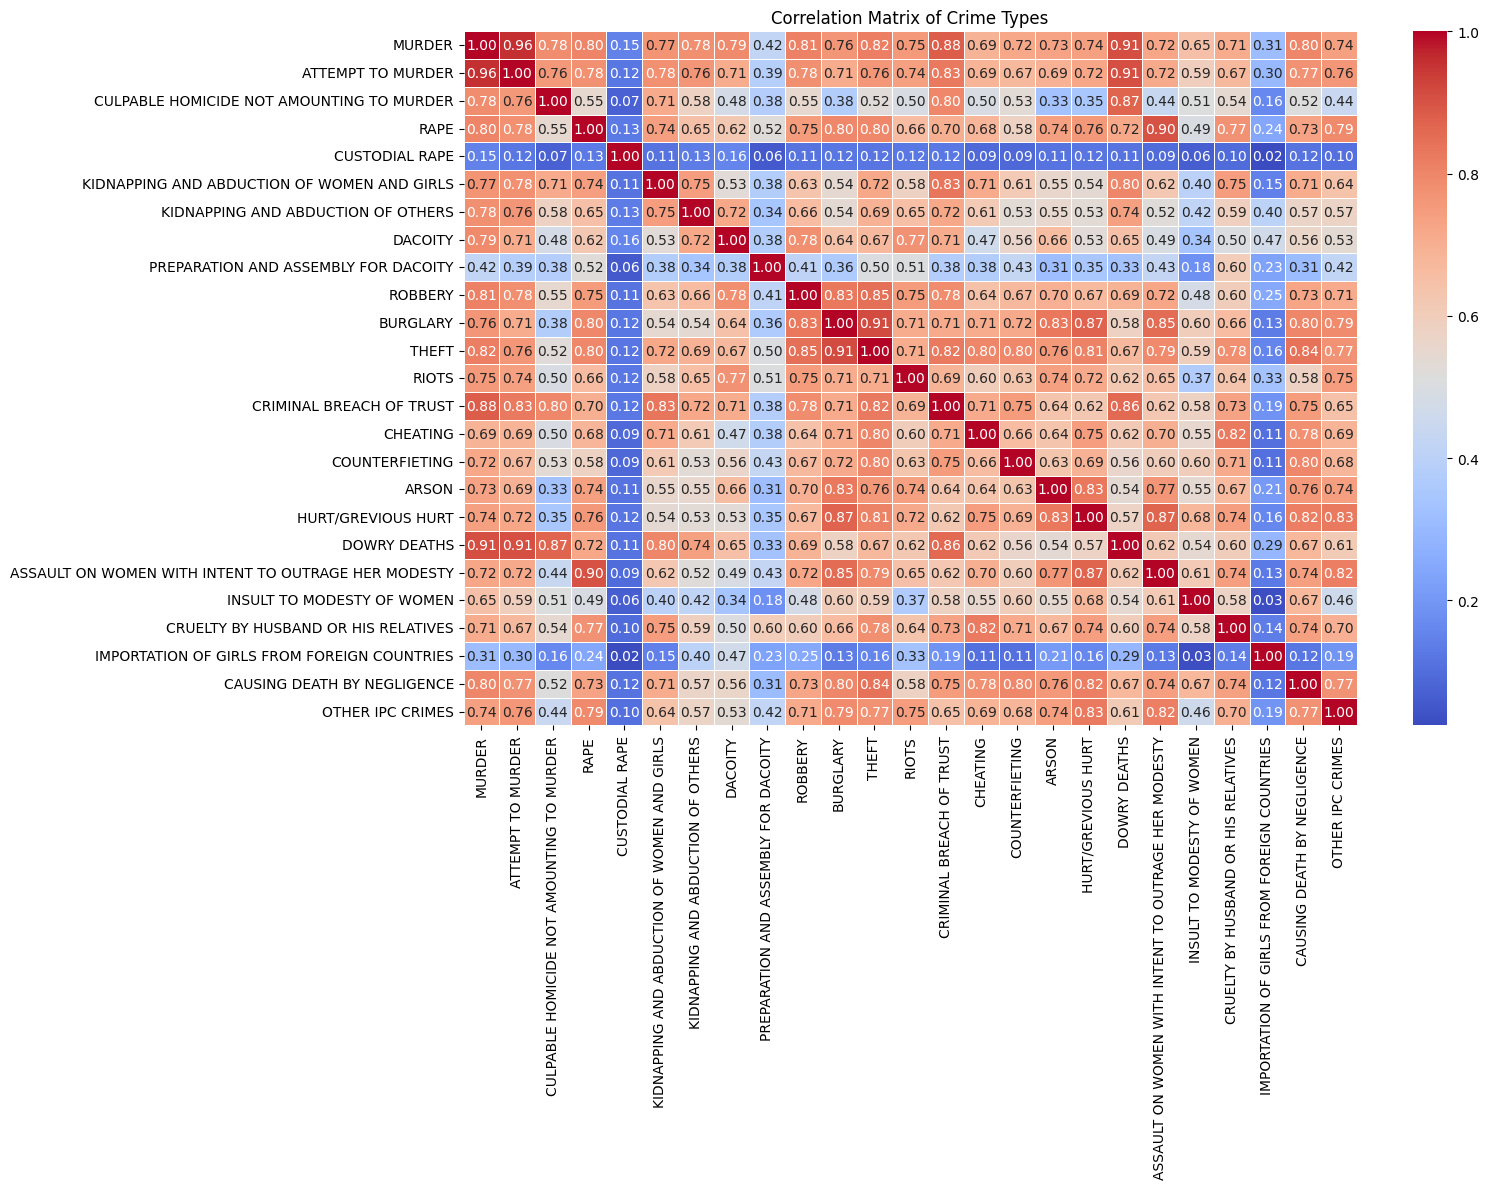

In [ ]:
plt.figure(figsize=(16, 12))
# Select only numerical crime columns for correlation
crime_columns = crime.select_dtypes(include=np.number).drop(columns=['YEAR', 'TOTAL IPC CRIMES', 'KIDNAPPING & ABDUCTION', 'OTHER RAPE', 'AUTO THEFT', 'OTHER THEFT'], errors='ignore')
# Calculate the correlation matrix
corr_matrix = crime_columns.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Crime Types')
plt.tight_layout()
plt.show()

10. *Boxplot for Distribution of Rape Cases by Top 5 States/UTs in 2013*

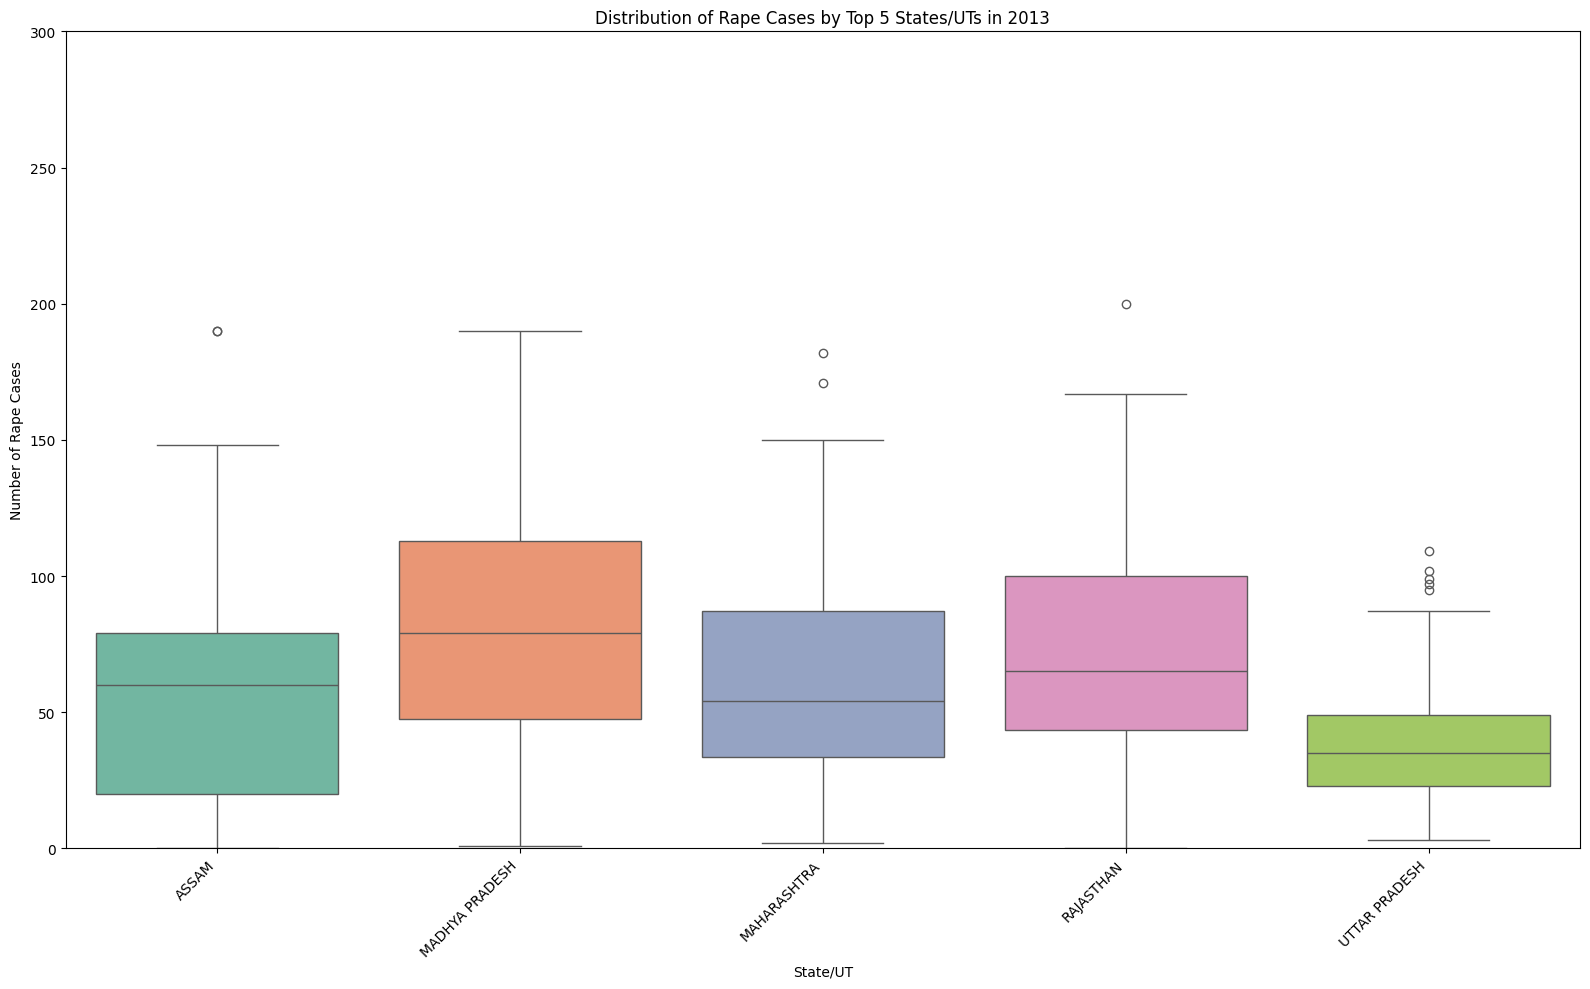

In [ ]:
# Step 1: Get the latest year
latest_year = crime['YEAR'].max()

# Step 2: Filter for the latest year
crime_latest_year = crime[crime['YEAR'] == latest_year]

# Step 3: Get top 5 states by rape cases
top_5_states = crime_latest_year.groupby('STATE/UT')['RAPE'].sum().sort_values(ascending=False).head(5).index.tolist()

# Step 4: Filter full data for those states
crime_top_states_latest = crime_latest_year[crime_latest_year['STATE/UT'].isin(top_5_states)]

# Step 5: Plot boxplot
plt.figure(figsize=(16, 10))
sns.boxplot(x='STATE/UT', y='RAPE', hue='STATE/UT', data=crime_top_states_latest, palette='Set2')

plt.title(f'Distribution of Rape Cases by Top 5 States/UTs in {latest_year}')
plt.xlabel('State/UT')
plt.ylabel('Number of Rape Cases')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 300)
plt.tight_layout()
plt.show()


11. *Scatter plot of theft Vs burglary crimes*

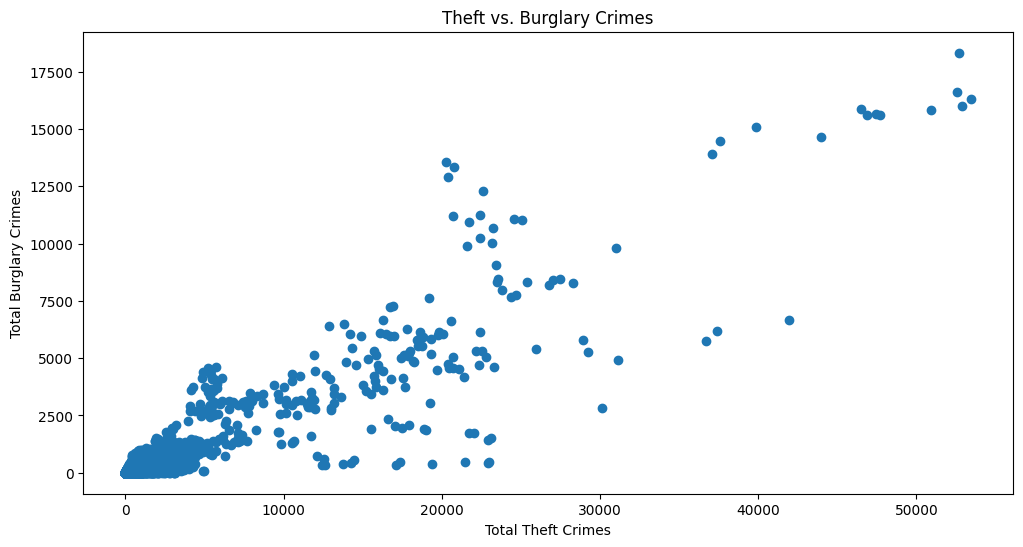

In [ ]:
# Create a scatter plot of theft and burglary crimes
plt.figure(figsize=(12, 6))
plt.scatter(crime['THEFT'], crime['BURGLARY'])
plt.xlabel('Total Theft Crimes')
plt.ylabel('Total Burglary Crimes')
plt.title('Theft vs. Burglary Crimes')
plt.show()

# CORRELATION

In [ ]:
crime_numeric = crime.select_dtypes(include='number')  # Keep only numeric columns
correlation_matrix = crime_numeric.corr()
print(correlation_matrix)


                                                        YEAR    MURDER  \
YEAR                                                1.000000 -0.014588   
MURDER                                             -0.014588  1.000000   
ATTEMPT TO MURDER                                   0.002504  0.957058   
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER          -0.007766  0.783331   
RAPE                                                0.042352  0.804640   
CUSTODIAL RAPE                                     -0.004074  0.147950   
OTHER RAPE                                          0.042357  0.804615   
KIDNAPPING & ABDUCTION                              0.074994  0.812158   
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS         0.087115  0.769808   
KIDNAPPING AND ABDUCTION OF OTHERS                  0.024376  0.779709   
DACOITY                                            -0.035842  0.790893   
PREPARATION AND ASSEMBLY FOR DACOITY                0.016628  0.422544   
ROBBERY                               

**CLEANED HEATMAP**

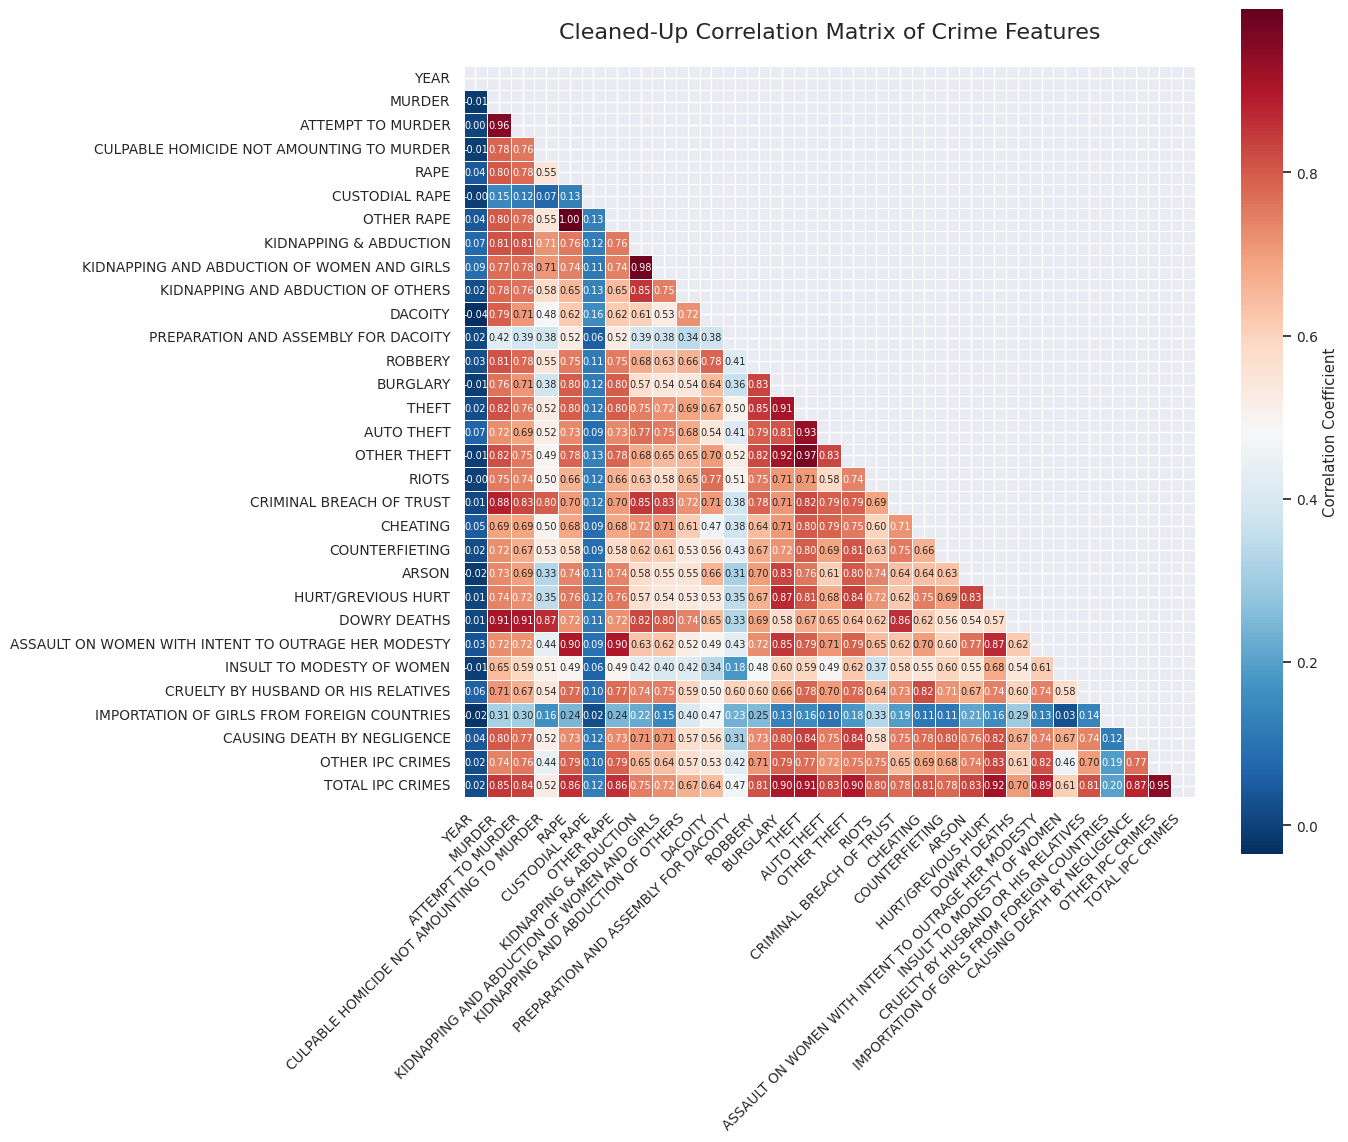

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
crime_numeric = crime.select_dtypes(include='number')

# Calculate correlation matrix
corr = crime_numeric.corr()

# Create a mask for the upper triangle (optional, for clean layout)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))
sns.set(font_scale=0.9)  # Adjust font size for readability

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap='RdBu_r',annot=True,fmt=".2f",linewidths=0.5,square=True,cbar_kws={"label": "Correlation Coefficient"},annot_kws={"size": 7})
plt.title("Cleaned-Up Correlation Matrix of Crime Features", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


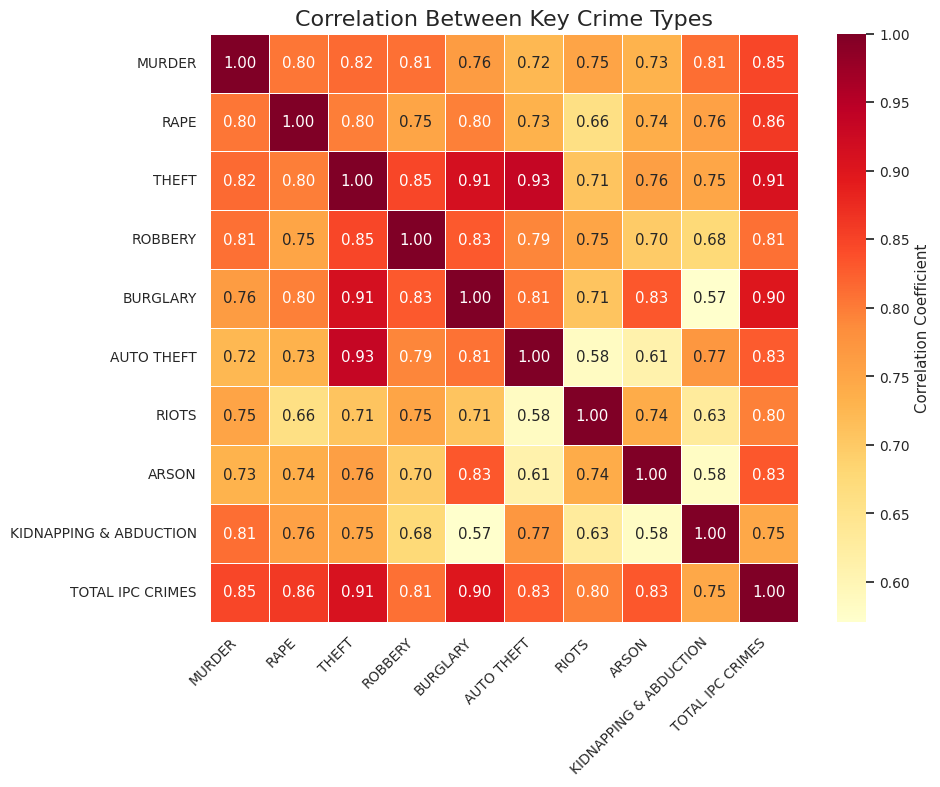

In [ ]:
top_features = ['MURDER', 'RAPE', 'THEFT', 'ROBBERY', 'BURGLARY',
                'AUTO THEFT', 'RIOTS', 'ARSON', 'KIDNAPPING & ABDUCTION', 'TOTAL IPC CRIMES']
selected_corr = crime_numeric[top_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    selected_corr,
    cmap='YlOrRd',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"label": "Correlation Coefficient"}
)
plt.title("Correlation Between Key Crime Types", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# **Statistical Data Analysis**

In [ ]:
import math
import statistics
import scipy.stats as stats

*MEAN*

In [ ]:
crime.mean(numeric_only=True)


,0
YEAR,2007.161890
MURDER,88.565854
ATTEMPT TO MURDER,78.738618
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,9.754878
RAPE,55.456098
CUSTODIAL RAPE,0.005488
OTHER RAPE,55.450610
KIDNAPPING & ABDUCTION,85.836992
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,64.184553
KIDNAPPING AND ABDUCTION OF OTHERS,21.652439


*MODE*

In [ ]:
crime.mode()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,UTTAR PRADESH,TOTAL,2013,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,248


*MEDIAN*

In [ ]:
crime.median(numeric_only=True)

,0
YEAR,2007.0
MURDER,37.0
ATTEMPT TO MURDER,28.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,2.0
RAPE,21.0
CUSTODIAL RAPE,0.0
OTHER RAPE,21.0
KIDNAPPING & ABDUCTION,26.0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,19.0
KIDNAPPING AND ABDUCTION OF OTHERS,5.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(crime['DISTRICT'])  # 'ADILABAD' becomes a number


In [ ]:
# split into features and target variables
# X = iris[['MURDER', 'RAPE', 'THEFT', 'ROBBERY', 'BURGLARY]]
y = crime['YEAR']
x = crime[['MURDER', 'RAPE', 'THEFT', 'ROBBERY', 'BURGLARY']]  # ensure these are numeric

X = crime.iloc[:, 1:-1]
Y= crime.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

model = LogisticRegression(max_iter=1000)
model.fit(x_scaled, y)


LogisticRegression(max_iter=1000)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
crime = pd.read_csv('/content/crime.csv')

# Select features and target
features = crime[['STATE/UT', 'DISTRICT', 'YEAR']]
target = crime['TOTAL IPC CRIMES']

# Encode categorical data
features = pd.get_dummies(features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 99291064.97806433


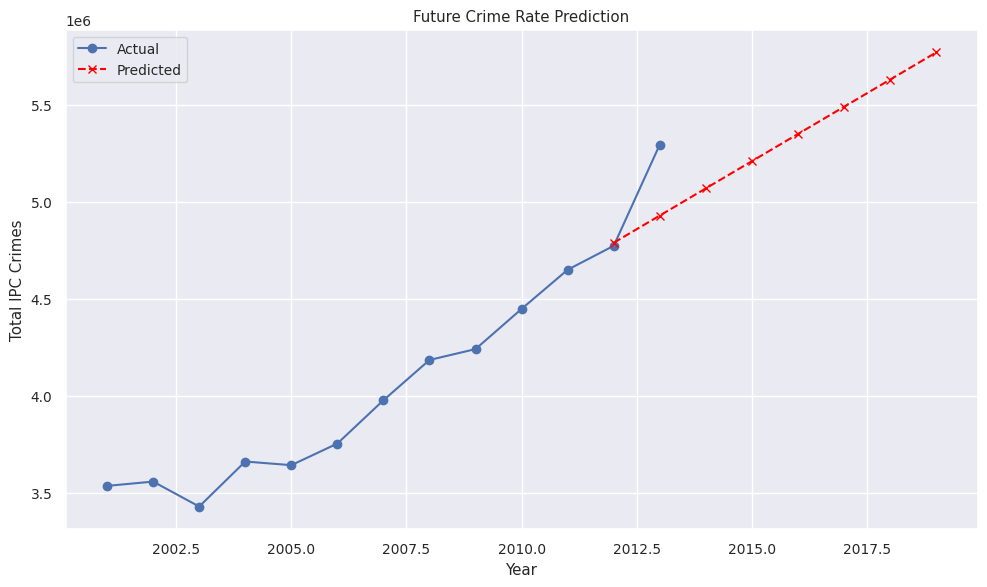

   YEAR  Predicted Crimes
0  2012           4790169
1  2013           4930099
2  2014           5070029
3  2015           5209959
4  2016           5349889
5  2017           5489819
6  2018           5629749
7  2019           5769679


In [ ]:
# 📌 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 📌 Step 1: Load data
df = pd.read_csv("crime.csv")

# 📌 Step 2: Group by year and sum total crimes
yearly_crime = df.groupby("YEAR")["TOTAL IPC CRIMES"].sum().reset_index()

# 📌 Step 3: Prepare training data
X = yearly_crime[["YEAR"]]
y = yearly_crime["TOTAL IPC CRIMES"]

# 📌 Step 4: Train Linear Regression model
model = LinearRegression()
model.fit(X, y)

# 📌 Step 5: Predict future years
future_years = pd.DataFrame({"YEAR": list(range(2012, 2020))})
future_predictions = model.predict(future_years)
future_years["Predicted Crimes"] = future_predictions.round().astype(int)

# 📌 Step 6: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(X["YEAR"], y, marker='o', label="Actual")
plt.plot(future_years["YEAR"], future_years["Predicted Crimes"], marker='x', linestyle='--', color='red', label="Predicted")
plt.xlabel("Year")
plt.ylabel("Total IPC Crimes")
plt.title("Future Crime Rate Prediction")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 📌 Step 7: Print future predictions
print(future_years)


In [ ]:
import pandas as pd

# Load your CSV file
df = pd.read_csv("crime.csv")

# Group by year and sum total IPC crimes
yearly_crime = df.groupby("YEAR")["TOTAL IPC CRIMES"].sum().reset_index()

# Calculate year-over-year percentage change
yearly_crime["Yearly % Change"] = yearly_crime["TOTAL IPC CRIMES"].pct_change() * 100
yearly_crime["Yearly % Change"] = yearly_crime["Yearly % Change"].round(2)

# Display the result
print(yearly_crime)


    YEAR  TOTAL IPC CRIMES  Yearly % Change
0   2001           3538616              NaN
1   2002           3560660             0.62
2   2003           3432240            -3.61
3   2004           3664020             6.75
4   2005           3645204            -0.51
5   2006           3756586             3.06
6   2007           3979346             5.93
7   2008           4186758             5.21
8   2009           4242690             1.34
9   2010           4449662             4.88
10  2011           4651150             4.53
11  2012           4774376             2.65
12  2013           5295444            10.91


In [ ]:
# Already have this from prediction step
future_years = pd.DataFrame({"YEAR": list(range(2013, 2020))})
future_years["Predicted Crimes"] = model.predict(future_years).round().astype(int)

# Calculate year-over-year percentage change
future_years["% Change"] = future_years["Predicted Crimes"].pct_change() * 100
future_years["% Change"] = future_years["% Change"].round(2)

print(future_years)

   YEAR  Predicted Crimes  % Change
0  2013           4930099       NaN
1  2014           5070029      2.84
2  2015           5209959      2.76
3  2016           5349889      2.69
4  2017           5489819      2.62
5  2018           5629749      2.55
6  2019           5769679      2.49


In [ ]:
#📦 Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# ✅ Step 1: Load the dataset
df = pd.read_csv("crime.csv")
print("✅ Dataset Loaded Successfully")

# ✅ Step 2: Check columns
print("Columns:\n", df.columns)

# ✅ Step 3: Set Features (X) and Target (y)
# Drop non-numeric or identifier columns
X = df.drop(columns=['STATE/UT', 'DISTRICT', 'YEAR', 'TOTAL IPC CRIMES'])
y = df['TOTAL IPC CRIMES']

# ✅ Step 4: Feature Scaling (Optional but improves performance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ✅ Step 6: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_score = r2_score(y_test, lr_preds)
print("📘 Linear Regression R² Score:", round(lr_score * 100, 2), "%")

# ✅ Step 7: Logistic Regression (not ideal for regression, but included for comparison)
try:
    y_train_class = (y_train > y_train.mean()).astype(int)
    y_test_class = (y_test > y_train.mean()).astype(int)

    log_model = LogisticRegression(max_iter=1000)
    log_model.fit(X_train, y_train_class)
    log_preds = log_model.predict(X_test)
    log_score = r2_score(y_test_class, log_preds)
    print("📙 Logistic Regression R² Score:", round(log_score * 100, 2), "%")
except Exception as e:
    print("❗ Logistic Regression failed:", e)

# ✅ Step 8: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_score = r2_score(y_test, rf_preds)
print("🌳 Random Forest R² Score:", round(rf_score * 100, 2), "%")

✅ Dataset Loaded Successfully
Columns:
 Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')
📘 Linear Regression R² Score: 100.0 %
📙 Logistic Regression R² Score: 86.19 %
🌳 Random Forest R² Score: 99.08 %


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import joblib

# Load data
data = pd.read_csv('crime.csv')
data.fillna(0, inplace=True)

# Select crime columns to melt
crime_columns = data.columns[3:-1]  # Exclude 'STATE/UT', 'DISTRICT', 'YEAR', 'TOTAL'

# Convert from wide to long format
long_df = data.melt(
    id_vars=['DISTRICT', 'YEAR'],
    value_vars=crime_columns,
    var_name='CRIME_TYPE',
    value_name='COUNT'
)

# Remove zero-crime entries
long_df = long_df[long_df['COUNT'] > 0]

# Encode DISTRICT and CRIME_TYPE
district_encoder = LabelEncoder()
crime_encoder = LabelEncoder()

long_df['DISTRICT_ENC'] = district_encoder.fit_transform(long_df['DISTRICT'])
long_df['CRIME_ENC'] = crime_encoder.fit_transform(long_df['CRIME_TYPE'])

# Define features and label
X = long_df[['YEAR', 'DISTRICT_ENC']]
y = long_df['CRIME_ENC']

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Save everything
joblib.dump(model, 'model.pkl')
joblib.dump(district_encoder, 'district_encoder.pkl')
joblib.dump(crime_encoder, 'crime_encoder.pkl')

print("✅ Model and encoders saved successfully.")


✅ Model and encoders saved successfully.
